<a href="https://colab.research.google.com/github/rjhalliday/python-examples/blob/main/scikit_make_classification_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn make_classification examples

This notebook explores the use of make_classification from scikit-learn

The make_classification function in scikit-learn is used to generate synthetic datasets for classification tasks. It's particularly useful for creating data that can be used to test and evaluate machine learning algorithms.

make_classification takes several parameters:
* **n_samples**: The number of samples in the output data set
* **n_features**: The total number of features for each sample. This includes informative, redundant, and irrelevant features. Only informative and redundant features are specified, with irrelevant features making up the balance to equal the number of features in total (n_fatures). Features are the inputs for a machine learning (ML) model.
* **n_classes**: The total number of categories for the Machine Learning (ML) target variable.
* n_informative: The number of informative features. Informative features are features that have a relationship to the target.
* **n_redundant**: The number of redundant features
* **class_sep**: Controls if the classes overlap or not. class_sep > 1 will ensure that classes mostly do not overlap, however there can still be some overlap as the classes are very close to each other.
* n_clusters_per_class
* random_state

Features shape: (200, 2)
Labels shape: (200,)


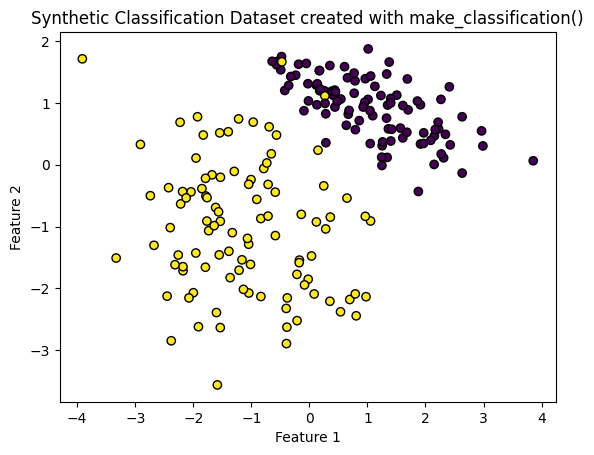

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset
#X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X, y = make_classification(n_samples = 200
                           ,n_features = 2
                           ,n_informative = 2
                           ,n_redundant = 0
                           ,n_clusters_per_class = 1
                           ,flip_y = 0
                           ,class_sep = 1
                           ,random_state = 40
                           )
# Print the shape of the dataset
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Optional: Plot the first two features for visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset created with make_classification()')
plt.show()


## Adjusting class_sep

In the example above, we saw class_sep = 1, which resulted in some overlap. If we decrease class_sep to 0, the classes will completely overlap, 0.5 will see partial overlap, 1 some overlap and 1.5 no overlap. Let's take a look:

Features shape: (200, 2)
Labels shape: (200,)


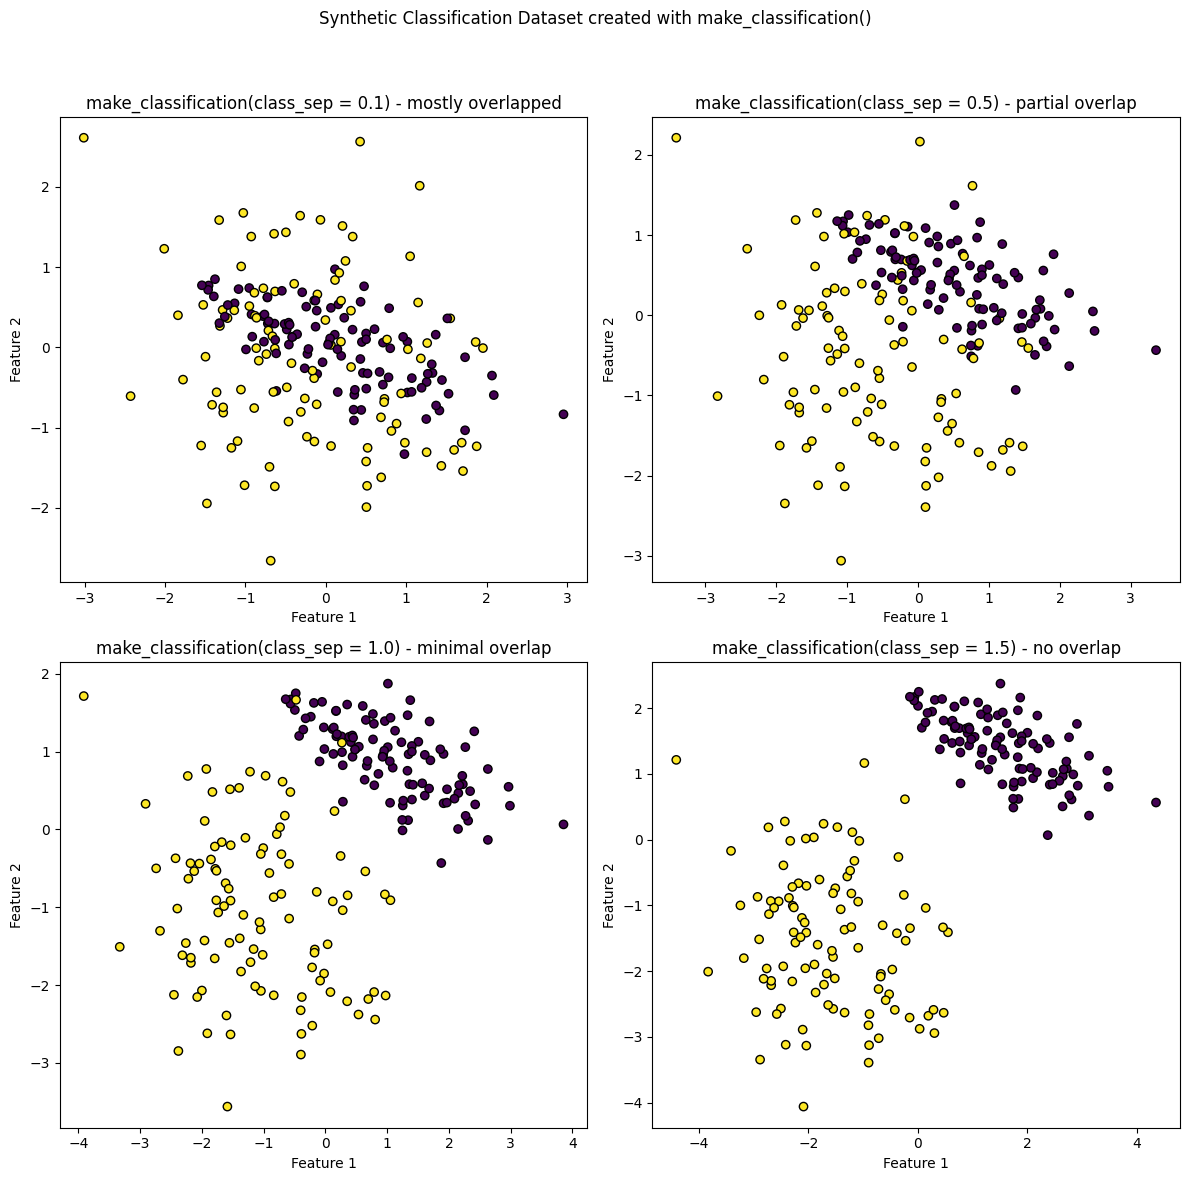

In [21]:
# Generate a synthetic dataset

# class_sep = 0.1 will see complete overlap
X_class_sep_01, y_class_sep_01 = make_classification(n_samples = 200
                           ,n_features = 2
                           ,n_informative = 2
                           ,n_redundant = 0
                           ,n_clusters_per_class = 1
                           ,flip_y = 0
                           ,class_sep = 0.1
                           ,random_state = 40
                           )

# class_sep = 0.5 will mean partial overlap
X_class_sep_05, y_class_sep_05 = make_classification(n_samples = 200
                           ,n_features = 2
                           ,n_informative = 2
                           ,n_redundant = 0
                           ,n_clusters_per_class = 1
                           ,flip_y = 0
                           ,class_sep = 0.5
                           ,random_state = 40
                           )

# class_sep = 1.0 will mean very little overlap
X_class_sep_10, y_class_sep_10 = make_classification(n_samples = 200
                           ,n_features = 2
                           ,n_informative = 2
                           ,n_redundant = 0
                           ,n_clusters_per_class = 1
                           ,flip_y = 0
                           ,class_sep = 1
                           ,random_state = 40
                           )

# class_sep = 1.5 have no overlap
X_class_sep_15, y_class_sep_15 = make_classification(n_samples = 200
                           ,n_features = 2
                           ,n_informative = 2
                           ,n_redundant = 0
                           ,n_clusters_per_class = 1
                           ,flip_y = 0
                           ,class_sep = 1.5
                           ,random_state = 40
                           )

# Print the shape of the dataset
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Plot on the first subplot (top-left)
# make the plots bigger
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(X_class_sep_01[:, 0], X_class_sep_01[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_classification(class_sep = 0.1) - mostly overlapped')

# Plot on the second subplot (top-right)
plt.subplot(2, 2, 2)
plt.scatter(X_class_sep_05[:, 0], X_class_sep_05[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_classification(class_sep = 0.5) - partial overlap')

# Plot on the third subplot (bottom-left)
plt.subplot(2, 2, 3)
plt.scatter(X_class_sep_10[:, 0], X_class_sep_10[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_classification(class_sep = 1.0) - minimal overlap')

# Plot on the fourth subplot (bottom-right)
plt.subplot(2, 2, 4)
plt.scatter(X_class_sep_15[:, 0], X_class_sep_15[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_classification(class_sep = 1.5) - no overlap')

# add a title above all plots
plt.suptitle('Synthetic Classification Dataset created with make_classification()')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to make room for the suptitle


plt.show()


# First let's try some simple logistic regression on the above data

In the below scatter plots, you can see how the different classes can move cleanly separated as class_sep increases

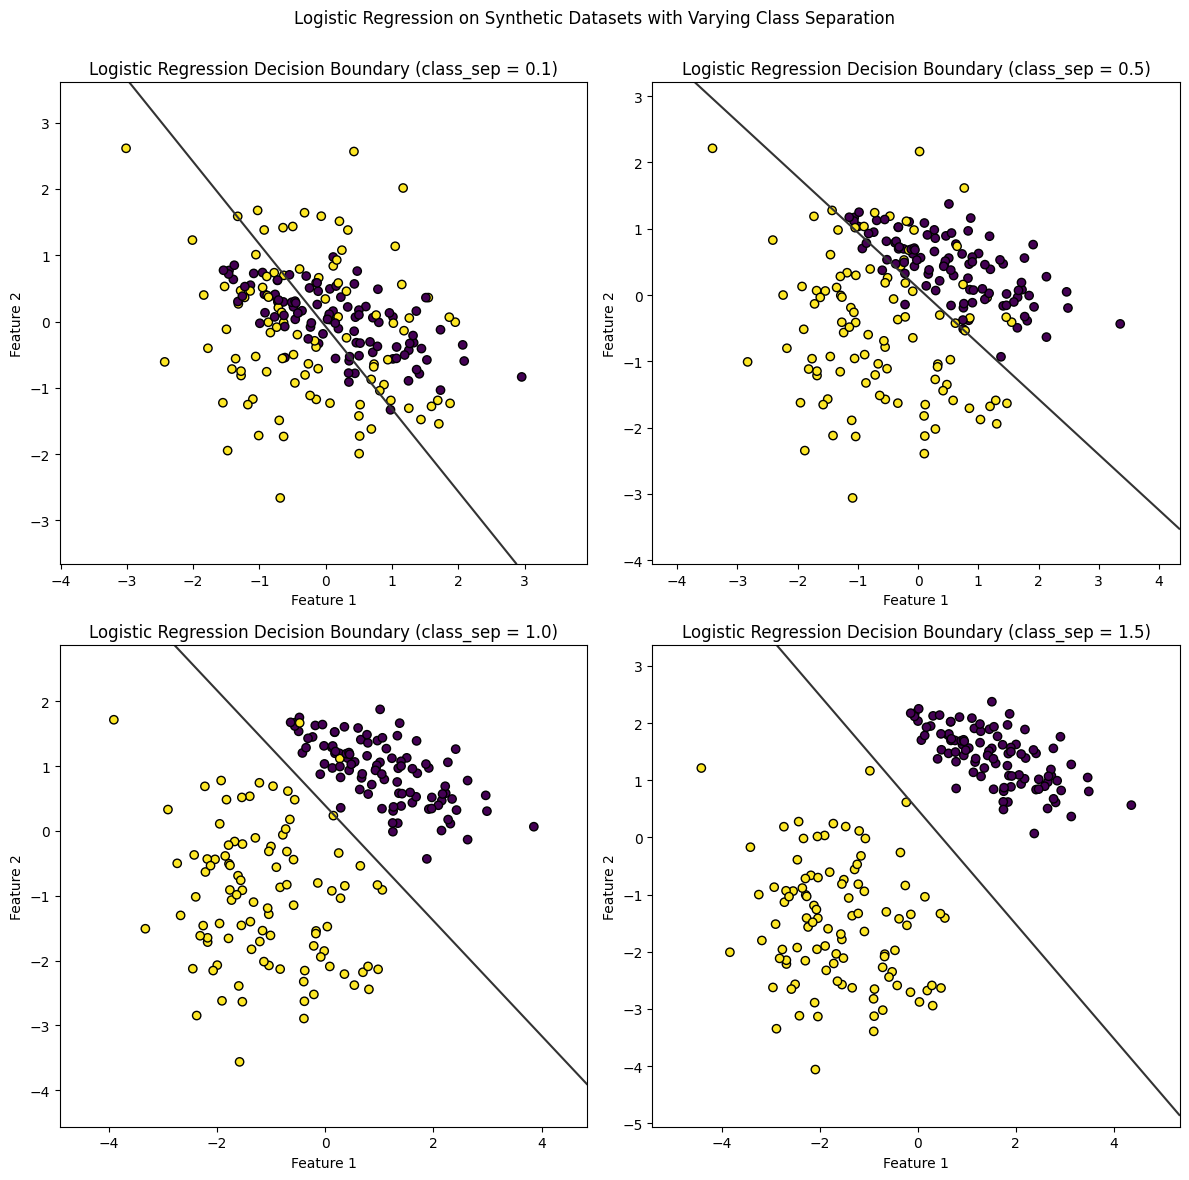

In [27]:
# perform logistic regression on all data sets and plot them

import matplotlib.pyplot as plt
import numpy as np
# Fit logistic regression models and plot decision boundaries for all datasets
datasets = [
    (X_class_sep_01, y_class_sep_01, 'class_sep = 0.1'),
    (X_class_sep_05, y_class_sep_05, 'class_sep = 0.5'),
    (X_class_sep_10, y_class_sep_10, 'class_sep = 1.0'),
    (X_class_sep_15, y_class_sep_15, 'class_sep = 1.5')
]

plt.figure(figsize=(12, 12))

for i, (X, y, title) in enumerate(datasets):
    model = LogisticRegression()
    model.fit(X, y)

    xx, yy = np.mgrid[X[:, 0].min()-1:X[:, 0].max()+1:.01,
                     X[:, 1].min()-1:X[:, 1].max()+1:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    plt.subplot(2, 2, i + 1)
    plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Logistic Regression Decision Boundary ({title})')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Logistic Regression on Synthetic Datasets with Varying Class Separation')
plt.show()


# Let's create a simple network to show how this classification works

> Add blockquote

